<a href="https://colab.research.google.com/github/mz-zarei/CGAN-Augmentation/blob/main/GANify_CrashDataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ganify==1.0.10

In [ ]:
import pandas as pd
import numpy as np

real_data  = pd.read_excel('/content/train_data.xlsx')
features = ['MED_dummy','RSW_dummy','log_AADT', 'log_L', 'FI']
real_data['FI'] += 1
real_data = real_data[features].copy().to_numpy()
classes = np.ones(real_data.shape[0])
print(real_data.shape)
print(classes.shape)

(250, 5)
(250,)


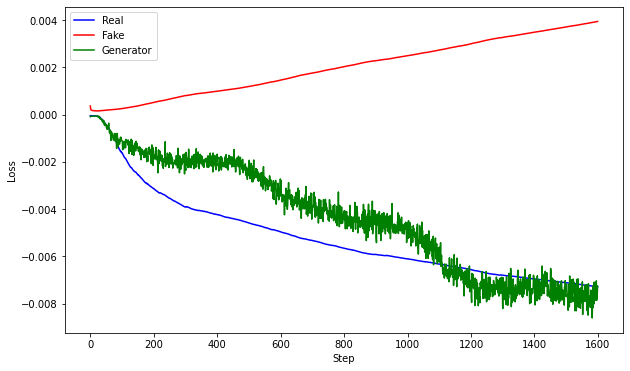

In [ ]:
from ganify.model import Ganify
gan = Ganify()
gan.fit_data(x_train = real_data, 
             y_train = classes, 
             type = 'wgan', 
             epochs = 400, 
             batch_size = 60)
gan.plot_performance()

In [ ]:
fake_data = gan.create_bulk(250)
fake_df = pd.DataFrame(fake_data, columns=features)
fake_df = fake_df.round({'MED_dummy':0, 'RSW_dummy':0, 'FI':0})
fake_df['type'] = 'fake'

real_df = pd.DataFrame(real_data, columns=features)
real_df['type'] = 'real'

all_df = pd.concat([real_df, fake_df]).reset_index(drop=True)

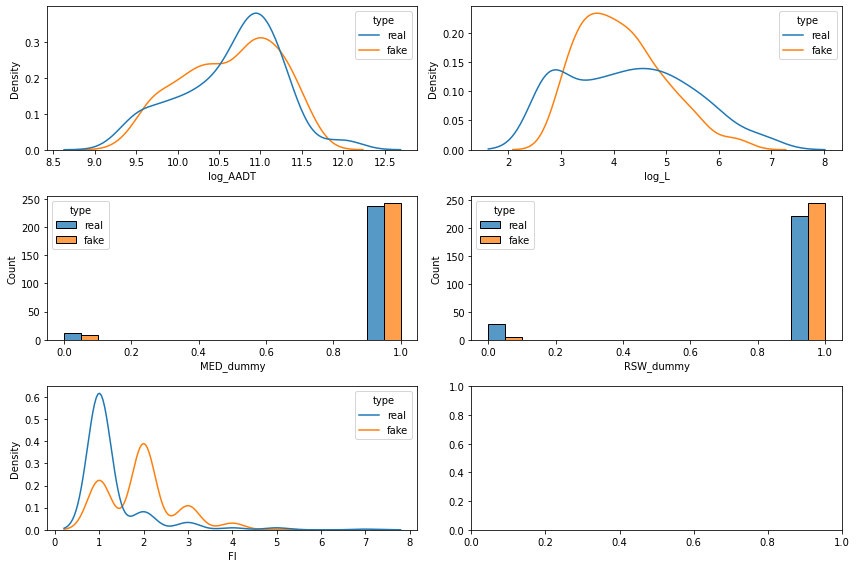

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,2,figsize=(12,8))

sns.kdeplot (data=all_df, x="log_AADT"   , hue="type", ax = ax[0,0], bw_adjust = 1)
sns.kdeplot (data=all_df, x="log_L"      , hue="type", ax = ax[0,1], bw_adjust = 1)
sns.histplot(data=all_df, x="MED_dummy"  , hue="type", ax = ax[1,0], multiple="dodge")
sns.histplot(data=all_df, x="RSW_dummy"  , hue="type", ax = ax[1,1], multiple="dodge")
sns.kdeplot (data=all_df, x="FI"         , hue="type", ax = ax[2,0], bw_adjust = 1)
plt.tight_layout()
plt.show()


In [ ]:
real_df.corr()

,MED_dummy,RSW_dummy,log_AADT,log_L,FI
MED_dummy,1.000000,0.157592,-0.168473,-0.049562,-0.196031
RSW_dummy,0.157592,1.000000,-0.057928,0.168737,-0.119131
log_AADT,-0.168473,-0.057928,1.000000,-0.065877,0.208688
log_L,-0.049562,0.168737,-0.065877,1.000000,0.317687
FI,-0.196031,-0.119131,0.208688,0.317687,1.000000


In [ ]:
fake_df.corr()

,MED_dummy,RSW_dummy,log_AADT,log_L,FI
MED_dummy,1.000000,-0.025974,0.244638,-0.186728,-0.128035
RSW_dummy,-0.025974,1.000000,0.219961,-0.251344,-0.298204
log_AADT,0.244638,0.219961,1.000000,-0.567203,-0.500253
log_L,-0.186728,-0.251344,-0.567203,1.000000,0.456359
FI,-0.128035,-0.298204,-0.500253,0.456359,1.000000


# **GMM**

In [1]:
import pandas as pd
import numpy as np

real_data  = pd.read_excel('/content/train_data.xlsx')
features = ['MED_dummy','RSW_dummy','log_AADT', 'log_L', 'FI']
real_data = real_data[features].copy().to_numpy()
print(real_data.shape)

(250, 5)


In [9]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
gm = GaussianMixture(n_components=50, random_state=0).fit(real_data)
bgm = BayesianGaussianMixture(n_components=50, random_state=0).fit(real_data)

fake_data_gm = gm.sample(250)[0]
fake_data_bgm = gm.sample(250)[0]

fake_df_gm = pd.DataFrame(fake_data_gm, columns=features)
fake_df_gm = fake_df_gm.round({'MED_dummy':0, 'RSW_dummy':0, 'FI':0})
fake_df_gm['type'] = 'fake GM'

fake_df_bgm = pd.DataFrame(fake_data_bgm, columns=features)
fake_df_bgm = fake_df_bgm.round({'MED_dummy':0, 'RSW_dummy':0, 'FI':0})
fake_df_bgm['type'] = 'fake BGM'

real_df = pd.DataFrame(real_data, columns=features)
real_df['type'] = 'real'

all_df = pd.concat([real_df, fake_df_gm, fake_df_bgm]).reset_index(drop=True)

In [5]:
fake_df.to_excel('fake.xlsx')

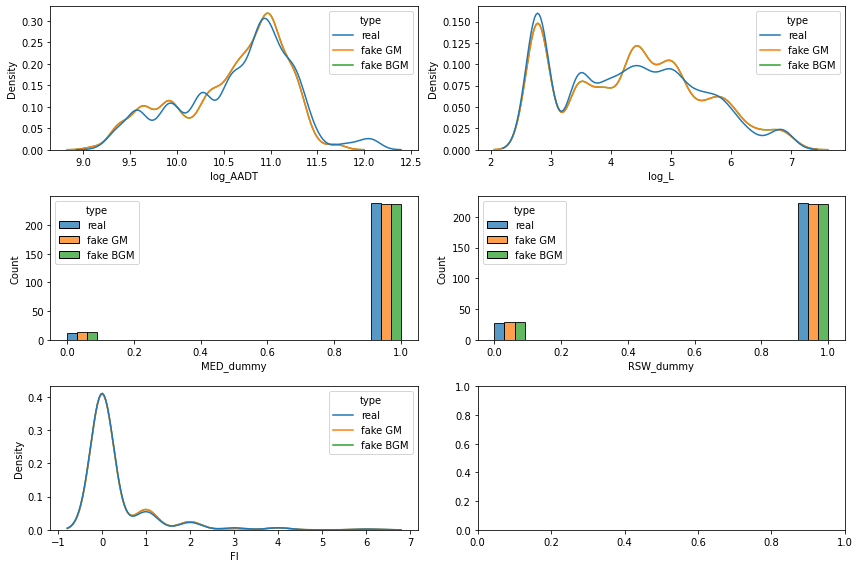

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,2,figsize=(12,8))

sns.kdeplot (data=all_df, x="log_AADT"   , hue="type", ax = ax[0,0], bw_adjust = 0.5)
sns.kdeplot (data=all_df, x="log_L"      , hue="type", ax = ax[0,1], bw_adjust = 0.5)
sns.histplot(data=all_df, x="MED_dummy"  , hue="type", ax = ax[1,0], multiple="dodge")
sns.histplot(data=all_df, x="RSW_dummy"  , hue="type", ax = ax[1,1], multiple="dodge")
sns.kdeplot (data=all_df, x="FI"         , hue="type", ax = ax[2,0], bw_adjust = 1)
plt.tight_layout()
plt.show()